# How healthy are our Heroes?

We all enjoy the adventures of the Caped Crusader or the mystic arts of Doctor Strange. They help us relax our minds and entertain ourselves. Thanks to [ClaudioDavi](https://www.kaggle.com/claudiodavi) we have a dataset of the attributes of various superheros by various publishers (Marvel Comics, DC Comics, Dark Horse Comics, etc.). So, I think it is time we see how healthy our heroes are.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
print(os.listdir("../data"))
import warnings
warnings.filterwarnings('ignore')

['heroes_information.csv', 'superhero-set.zip', 'super_hero_powers.csv']


In [2]:
hero_info = pd.read_csv('../data/heroes_information.csv')
hero_info.head(10)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


Here we see how the Dataset is structured. You will notice that some records have a value of **-99** in Height and Weight. 


In [3]:
hero_info[(hero_info['Weight'] < 0)].head(10)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
21,21,Ando Masahashi,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
23,23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
26,26,Angela,Female,-,-,-,-99.0,Image Comics,-,bad,-99.0
31,31,Anti-Monitor,Male,yellow,God / Eternal,No Hair,61.0,DC Comics,-,bad,-99.0
32,32,Anti-Spawn,Male,-,-,-,-99.0,Image Comics,-,bad,-99.0


I chose some heros that have such values in their weights or heights. I then looked at these attributes in [FANDOM](http://www.wikia.com/fandom) sites of the corresponding publishers. I understood that the weights or heights of these heroes were either not recorded are variable. This is understandable as lot of the characters are cosmic or mystical entities and/or can modify their physical appearances.

In [4]:
hero_pow = pd.read_csv('../data/super_hero_powers.csv')
hero_pow.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Here we have the data of the powers of the heros. Some of these are too specific, like the [Lantern Power Ring](http://dc.wikia.com/wiki/Green_Lantern_Ring), [Omnitirix](https://ben10.fandom.com/wiki/Omnitrix)

Let's convert the True/False values to numbers (Most of the times, numbers are easier to handle).

In [5]:
hero_pow = hero_pow*1
hero_pow.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
hero_info.shape[0] == hero_pow.shape[0]

False

The number of heros mentioned in the two files are different. So, Let's choose the attributes of the heros present in both the files

In [7]:
names = []
weights = []
agility = []
stamina = []
total_abilities = []
gender = []
height = []
alignments = []
publisher = []
for name, agi, sta, gen, ali, pub in zip(hero_pow['hero_names'], hero_pow['Agility'], hero_pow['Stamina'], hero_info['Gender'], hero_info['Alignment'], hero_info['Publisher']):
    w = hero_info[hero_info['name'] == name]['Weight'].values
    h = hero_info[hero_info['name'] == name]['Height'].values
    abilities = sum(hero_pow[hero_pow['hero_names']==name].iloc[:,1:].values[0])
    if w.shape[0] != 0:
        names.extend([name])
        total_abilities.extend([abilities])
        weights.extend([sum(w)/w.shape[0]])
        agility.extend(['Agile' if agi == 1 else 'Not Agile'])
        stamina.extend(['Has Stamina' if sta == 1 else 'No Stamina'])
        gender.extend([gen])
        height.extend([sum(h)/h.shape[0]])
        alignments.extend([ali])
        publisher.extend([pub])

In [8]:
weights = np.array(weights)
height = np.array(height)
filtered = pd.DataFrame()
filtered['Name'] = np.array(names)[(weights > 0) & (height > 0)]
filtered['Weight'] = weights[(weights > 0) & (height > 0)]
filtered['Agility'] = np.array(agility)[(weights > 0) & (height > 0)]
filtered['Stamina'] = np.array(stamina)[(weights > 0) & (height > 0)]
filtered['Total Abilities'] = np.array(total_abilities)[(weights > 0) & (height > 0)]
filtered['Gender'] = np.array(gender)[(weights > 0) & (height > 0)]
filtered['Height'] = np.array(height)[(weights > 0) & (height > 0)]
filtered['Alignment'] = np.array(alignments)[(weights > 0) & (height > 0)]
filtered['Publisher'] = np.array(publisher)[(weights > 0) & (height > 0)]

In [9]:
filtered.head()

,Name,Weight,Agility,Stamina,Total Abilities,Gender,Height,Alignment,Publisher
0,A-Bomb,441.0,Not Agile,Has Stamina,7,Male,203.0,good,Dark Horse Comics
1,Abe Sapien,65.0,Agile,Has Stamina,16,Male,191.0,good,DC Comics
2,Abin Sur,90.0,Not Agile,No Stamina,1,Male,185.0,bad,Marvel Comics
3,Abomination,441.0,Not Agile,Has Stamina,8,Male,203.0,bad,Marvel Comics
4,Absorbing Man,122.0,Not Agile,No Stamina,11,Male,193.0,good,NBC - Heroes


I was curious to know if Heavy characters were agile. 

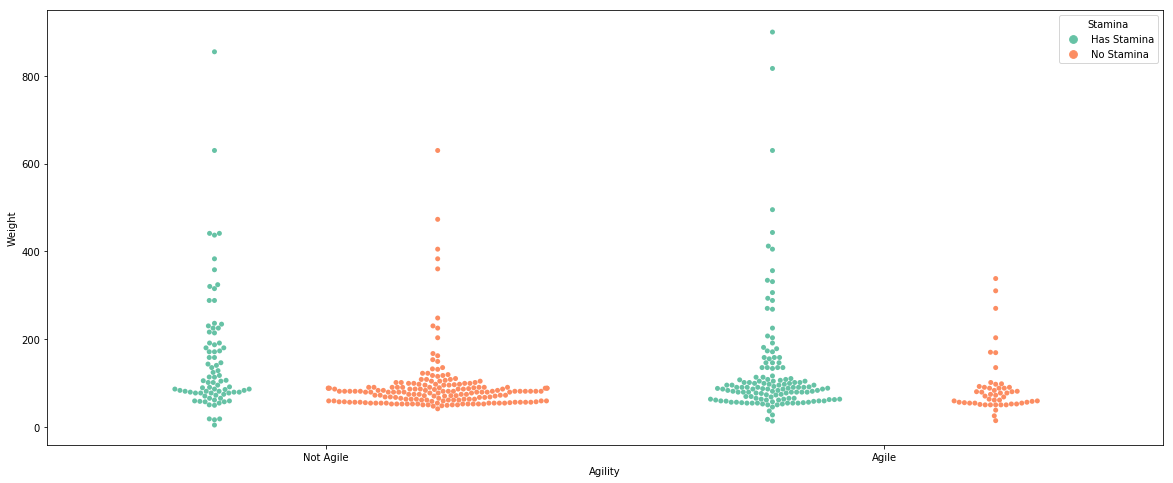

In [10]:
plt.figure(figsize = (20,8))
sns.swarmplot(filtered['Agility'], filtered['Weight'], hue = filtered['Stamina'], palette="Set2", dodge=True)

Turns out, they are.
The Heaviest character in the dataset is also agile. Let's see who that is.

In [11]:
print(filtered['Name'][filtered['Weight']==max(filtered['Weight'])])

345    Sasquatch
Name: Name, dtype: object


It's [Sasquatch](http://marvel.wikia.com/wiki/Sasquatch). Better not be on the bad side of him.

In the above plot, it is interesting to note that characters who are not agile don't have stamina.

Now, Let's take a look at the Gender distribution of the characters

In [12]:
print('Unique Genders in Dataset: {}'.format(np.unique(filtered['Gender'])))

Unique Genders in Dataset: ['-' 'Female' 'Male']


We see that **'-'** exists in the dataset for *Gender*. Let's take a look at the characters who have **-** for their gender.  

In [13]:
filtered[filtered['Gender']=='-']

,Name,Weight,Agility,Stamina,Total Abilities,Gender,Height,Alignment,Publisher
54,Black Bolt,95.0,Agile,Has Stamina,13,-,188.0,good,Marvel Comics
84,Captain America,108.0,Agile,Has Stamina,10,-,188.0,good,Marvel Comics
85,Captain Atom,90.0,Agile,No Stamina,27,-,193.0,good,Marvel Comics
100,Cloak,70.0,Not Agile,No Stamina,5,-,226.0,good,Marvel Comics
103,Cottonmouth,99.0,Not Agile,No Stamina,1,-,183.0,good,Marvel Comics
110,Darkhawk,81.0,Not Agile,No Stamina,8,-,185.0,good,Marvel Comics
124,Doc Samson,171.0,Not Agile,Has Stamina,3,-,198.0,good,Marvel Comics
150,Firelord,99.0,Not Agile,No Stamina,6,-,193.0,bad,Marvel Comics
164,Ghost Rider,99.0,Agile,Has Stamina,19,-,188.0,good,Marvel Comics
167,Goblin Queen,50.0,Not Agile,No Stamina,3,-,168.0,good,Marvel Comics


Most of these Characters are Male, except for [Mockingbird](http://hero.wikia.com/wiki/Mockingbird) and [Goblin Queen](https://x-men.fandom.com/wiki/Goblin_Queen). So, I'll replace them myself.

In [14]:
_females = ('Mockingbird','Goblin Queen',)
def fill_missing(x):
    if(x['Gender']=='-'):
        if(x['Name'] in _females):
            return 'Female'
        else:
            return 'Male'
    else:
        return x['Gender']

filtered['Gender'] = filtered.apply(fill_missing, axis=1)

In [15]:
print('Unique Genders in Dataset: {}'.format(np.unique(filtered['Gender'])))

Unique Genders in Dataset: ['Female' 'Male']


Now, let's see the number of heroes in each gender in [Marvel](https://www.marvel.com/) and [DC](https://www.dcentertainment.com/) comics.

Text(0.5, 1.0, 'Gender count - Marvel Comics')

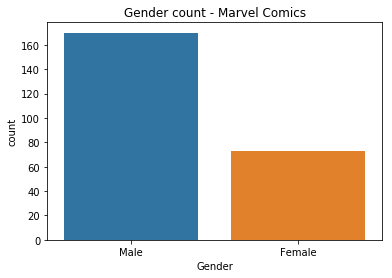

In [16]:
sns.countplot(filtered['Gender'][filtered['Publisher']=='Marvel Comics'])
plt.title('Gender count - Marvel Comics')

Text(0.5, 1.0, 'Gender Count - DC comics')

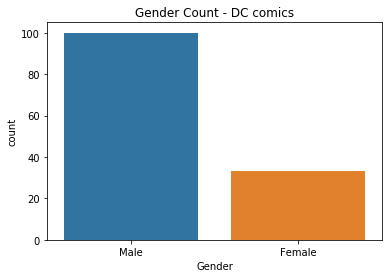

In [17]:
sns.countplot(filtered['Gender'][filtered['Publisher']=='DC Comics'])
plt.title('Gender Count - DC comics')

Looks like both of these publishers can improve on gender diversity

Now, let's take a look at how the Height of the Characters vary with their Weights

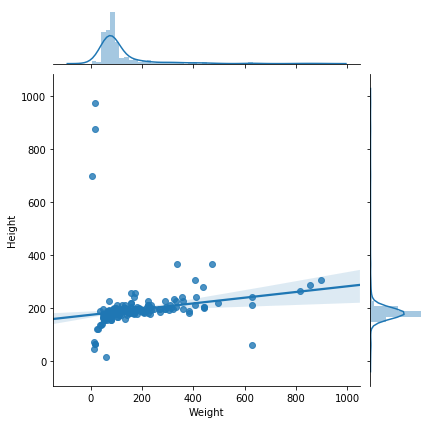

In [18]:
#plt.figure(figsize = (20,8))
sns.jointplot(x=filtered['Weight'], y=filtered['Height'], kind = 'reg')

Height and Weight appear to have an almost linear relationship

Now, for the part you're here.

Let's start by Calculating their [BMI(Body Mass Index)](https://en.wikipedia.org/wiki/Body_mass_index)

BMI is calculated as **Weight(in kg)/Height(in m)<sup>2</sup>**

Before we start calculating, we need to make sure that the data provided here is in the units we need (kg and m). How do we do that?

In [19]:
filtered.head()

,Name,Weight,Agility,Stamina,Total Abilities,Gender,Height,Alignment,Publisher
0,A-Bomb,441.0,Not Agile,Has Stamina,7,Male,203.0,good,Dark Horse Comics
1,Abe Sapien,65.0,Agile,Has Stamina,16,Male,191.0,good,DC Comics
2,Abin Sur,90.0,Not Agile,No Stamina,1,Male,185.0,bad,Marvel Comics
3,Abomination,441.0,Not Agile,Has Stamina,8,Male,203.0,bad,Marvel Comics
4,Absorbing Man,122.0,Not Agile,No Stamina,11,Male,193.0,good,NBC - Heroes


I checked the attributes for Abomination: http://marvel.wikia.com/wiki/Emil_Blonsky_(Earth-616)

I compared the attributes and concluded that the weights are in *kg* and the height in *cm*.

Let's proceed to calculate the BMI.

In [20]:
filtered['BMI'] = np.divide(filtered['Weight'], np.square(filtered['Height']/100))

Let's see how the BMI is distributed amon the Good guys

In [21]:
fig = ff.create_distplot([filtered['BMI'][(filtered['Alignment'] == 'good')  & (filtered['Gender'] == 'Male') & (filtered['BMI'] < 80)], filtered['BMI'][(filtered['Alignment'] == 'good')  & (filtered['Gender'] == 'Female') & (filtered['BMI'] < 80)]], ['BMI- Good, Male', 'BMI - Good, Female'])
fig['layout'].update(title='Distribution of BMI - Good', xaxis=dict(title='BMI'))
py.iplot(fig, filename='Basic Distplot')

I got the below table from [here](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

|BMI|Weight Status|
|-|-|
|Below 18.5|Underweight|
|18.5 – 24.9|Normal or Healthy Weight|
|25.0 – 29.9|Overweight|
|30.0 and Above|Obese|

Based on the table, we see that most of the characters have made it into the **Healthy Category** by a tiny amount.

Now, Let's look at the bad guys

In [22]:
fig = ff.create_distplot([filtered['BMI'][(filtered['Alignment'] == 'bad')  & (filtered['Gender'] == 'Male')], filtered['BMI'][(filtered['Alignment'] == 'bad')  & (filtered['Gender'] == 'Female')]], ['BMI- Bad, Male', 'BMI - Bad, Female'])
fig['layout'].update(title='Distribution of BMI - Bad', xaxis=dict(title='BMI'))
py.iplot(fig, filename='Basic Distplot')

Almost same here.

Just for fun, let's see who has the top 10 highest BMI.

In [23]:
filtered.sort_values(['BMI'], ascending=False).head(10)

,Name,Weight,Agility,Stamina,Total Abilities,Gender,Height,Alignment,Publisher,BMI
417,Utgard-Loki,58.0,Not Agile,Has Stamina,6,Female,15.2,good,Marvel Comics,2510.387812
165,Giganta,630.0,Not Agile,No Stamina,4,Male,62.5,good,Marvel Comics,1612.800000
328,Red Hulk,630.0,Not Agile,Has Stamina,12,Male,213.0,bad,Marvel Comics,138.861337
111,Darkseid,817.0,Agile,Has Stamina,28,Male,267.0,bad,DC Comics,114.603936
249,Machine Man,383.0,Not Agile,Has Stamina,5,Male,183.0,good,DC Comics,114.365911
398,Thanos,443.0,Agile,Has Stamina,31,Female,201.0,good,Marvel Comics,109.650751
122,Destroyer,383.0,Not Agile,No Stamina,5,Male,188.0,bad,DC Comics,108.363513
0,A-Bomb,441.0,Not Agile,Has Stamina,7,Male,203.0,good,Dark Horse Comics,107.015458
3,Abomination,441.0,Not Agile,Has Stamina,8,Male,203.0,bad,Marvel Comics,107.015458
197,Hulk,630.0,Agile,Has Stamina,18,Male,244.0,bad,George Lucas,105.818328


The winner is Utgard-Loki: http://marvel.wikia.com/wiki/Utgard-Loki_(Earth-616) . He is a cosmic being, So being overwheight must not be a matter to him.

This Data Visualization and Analysis shows us that most of the Characters are Healthy (at least by human standards).